# Progrma de Filtros gaussinos/laplace em py



utilizando a biblioteca do openCv e algumas outras...


In [1]:

pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [7]:
import cv2

# Substitua pelo caminho da imagem no seu PC
img = cv2.imread(r"D:\EDA\py\imagePy\gettyimages-187611956-612x612.JPG")

# Exibe a imagem em uma janela
cv2.imshow('Imagem', img)
cv2.waitKey(0)  # Aguarda um clique para fechar a janela
cv2.destroyAllWindows()

# Acessando o tamanho da imagem
print(img.shape)

(612, 469, 3)


In [8]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk

# Função para abrir e exibir a imagem
def abrir_imagem():
    caminho_imagem = filedialog.askopenfilename(title="Escolha uma imagem", 
                                                filetypes=[("Arquivos de imagem", "*.jpg;*.png;*.jpeg")])
    if caminho_imagem:
        img = Image.open(caminho_imagem)
        img.thumbnail((400, 400))  # Redimensionar a imagem para caber na tela
        img_tk = ImageTk.PhotoImage(img)
        lbl_imagem.config(image=img_tk)
        lbl_imagem.image = img_tk  # Necessário para o tkinter manter a referência da imagem

# Configurações da janela principal
root = tk.Tk()
root.title("Visualizador de Imagem")

# Botão para abrir a imagem
btn_abrir = tk.Button(root, text="Abrir Imagem", command=abrir_imagem)
btn_abrir.pack(pady=10)

# Label para exibir a imagem
lbl_imagem = tk.Label(root)
lbl_imagem.pack()

# Inicia o loop do tkinter
root.mainloop()

In [2]:
# Importa o módulo pyodbc para conexão com o banco de dados
import pyodbc 

# Importa o módulo tkinter para construção de interfaces gráficas
import tkinter as tk

# Importa todos os componentes do módulo tkinter
from tkinter import *

# Importa a classe ttk do módulo tkinter para usar widgets aprimorados
from tkinter import ttk,filedialog 

# Importa o módulo ttkbootstrap para aplicar temas Bootstrap no tkinter
import ttkbootstrap as ttkbs
from ttkbootstrap.constants import *

import cv2
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageTk


imagem_global = None


def cadastrar():

    janela_cadastrar = Toplevel(janela)
    janela_cadastrar.title("Cadastrar ")

    # Define o fundo da janela principal como um tom escuro
    janela_cadastrar.configure(bg = "#333")
    
    # Define a largura e a altura da janela principal
    largura_janela = 450
    altura_janela = 300
    
    # Obtém as dimensões da tela do usuário
    largura_tela = janela_cadastrar.winfo_screenwidth()
    altura_tela = janela_cadastrar.winfo_screenheight()
    
    # Calcula a posição da janela para que ela seja centralizada na tela
    pos_x = (largura_tela // 2) - (largura_janela // 2)
    pos_y = (altura_tela // 2) - (altura_janela // 2)
    
    # Define a geometria da janela para centralizá-la na tela
    janela_cadastrar.geometry('{}x{}+{}+{}'.format(largura_janela, altura_janela, pos_x, pos_y))


# Função para abrir e exibir a imagem
def abrir_imagem():
    global imagem_global  # Declara a variável global para modificá-la
    caminho_imagem = filedialog.askopenfilename(title="Escolha uma imagem", 
                                                filetypes=[("Arquivos de imagem", "*.jpg;*.png;*.jpeg")])
    if caminho_imagem:
        img = Image.open(caminho_imagem)
        img.thumbnail((400, 400))  # Redimensionar a imagem para caber na tela
        img_tk = ImageTk.PhotoImage(img)
        lbl_imagem.config(image=img_tk)
        lbl_imagem.image = img_tk  # Necessário para o tkinter manter a referência da imagem
        imagem_global = np.array(img)  # Converte a imagem PIL para NumPy,  Atribui a imagem PIL à variável global

def filtro_sobel():

    global imagem_global  # Acessa a variável global
    if imagem_global is not None and imagem_global.size > 0:
        if len(imagem_global.shape) == 3:  # Se for colorida, converte para grayscale
            imagem_gray = cv2.cvtColor(imagem_global, cv2.COLOR_RGB2GRAY)
        else:
            imagem_gray = imagem_global
        
        sobelx = cv2.Sobel(imagem_gray, cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(imagem_gray, cv2.CV_64F, 0, 1, ksize=3)
        # Combinar os gradientes
        sobel_combinado = np.sqrt(sobelx**2 + sobely**2)

        # Normalizar a imagem resultante para o intervalo 0-255
        sobel_combinado = np.uint8(255 * sobel_combinado / np.max(sobel_combinado))
        #sobel_combined = np.uint8(sobel_combined)  # Converte de volta para uint8 para exibir

        # Converte de volta para imagem PIL e exibe no Label da janela principal
        img_sobel = Image.fromarray(sobel_combinado)
        img_sobel.thumbnail((400, 400))
        img_sobel_tk = ImageTk.PhotoImage(img_sobel)
        
        lbl_imagem.config(image=img_sobel_tk)
        lbl_imagem.image = img_sobel_tk
        



# Cria a janela principal para a tela de login
janela = ttkbs.Window(themename="darkly")
janela.title("Tela de Selecção de Imagem")

# Define o fundo da janela principal como um tom escuro
janela.configure(bg = "#333" )

# Configura a janela para iniciar maximizada
janela.state('zoomed')


menu_principal = Menu(janela)

# Adiciona o menu à janela principal
janela.config(menu=menu_principal)

# Cria um submenu com tearoff
menu_opcoes = Menu(menu_principal, tearoff=0, bg="#1f4b99", fg="white", activebackground="#4a6fa5", activeforeground="white")

# Adiciona o submenu ao menu principal com o nome 'Menu'
menu_principal.add_cascade(label="Menu", menu=menu_opcoes)

# Adiciona itens ao submenu
menu_opcoes.add_command(label="Add imagem", command = abrir_imagem)
menu_opcoes.add_command(label="Aply filter", command = filtro_sobel)
menu_opcoes.add_command(label="Sair", command = janela.destroy)

lbl_imagem = tk.Label(janela, bg="#333")
lbl_imagem.pack(pady=20)

# Inicia o loop da interface gráfica
janela.mainloop()

# Inicia o loop da interface gráfica
janela.mainloop()

In [5]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# -*- coding: utf-8 -*-
from tkinter import Tk, PhotoImage
from tkinter import Entry as tkEntry
from tkinter.ttk import Frame, Label, Button, Separator, Style

# Funções
def login():
    et_email.delete(0, 'end')
    et_senha.delete(0, 'end')
    et_email.focus_force()

def nova_conta():
    et_email.focus_force()

# Criação da janela principal
root = Tk()

# Estilo
style = Style()
style.theme_use('default')
style.configure('TFrame', background='#fff')
style.configure('Borda.TFrame', width=300)
style.configure('TLabel', justify='right', font=('Montserrat', 10), background='#fff', foreground='#808080')
style.configure('Small.TLabel', font=('Montserrat', 8))
style.configure('TButton', padding=(60, 7), font=('Montserrat ExtraBold', 12, 'bold'), foreground='#fff', background='#20bcbb', relief='')
style.configure('Small.TButton', padding=(0, -3), font=('Montserrat', 8), width=0, height=0, foreground='#20bcbb', background='#fff', relief='')
style.configure('TSeparator', background='#bafafa')

# Frames
borda = Frame(root, style='Borda.TFrame')
borda.pack(fill='x', expand=True)

topo = Frame(borda)
topo.pack()

centro = Frame(borda)
centro.pack()

base = Frame(borda)
base.pack()

# Carregamento da imagem
try:
    logo = PhotoImage(file=r'D:/EDA/py/imagePy/apple.PNG')  # Verifique o caminho
    lb_logo = Label(topo, image=logo)
    lb_logo.image = logo  # Mantém uma referência à imagem
    lb_logo.pack()
except Exception as e:
    print(f"Erro ao carregar a imagem: {e}")

# Labels e Entradas
Label(centro, text='E-mail').pack(anchor='w', pady=(10, 0))
et_email = tkEntry(centro, font=('Montserrat', 12, 'bold'), fg='#666', relief='flat',
                   highlightbackground='white', highlightcolor='white')
et_email.pack(fill='x')
Separator(centro, orient='horizontal').pack(fill='x')

Label(centro, text='Senha').pack(anchor='w', pady=(10, 0))
et_senha = tkEntry(centro, show='*', font=('Montserrat', 12, 'bold'), fg='#666', relief='flat',
                   highlightbackground='white', highlightcolor='white')
et_senha.pack()
Separator(centro, orient='horizontal').pack(fill='x', pady=(0, 20))

Button(base, text='ENTRAR', command=login, cursor='hand1').pack(fill='x', pady=(0, 10))
Label(base, text='Ainda não tens uma conta? ', style='Small.TLabel').pack(side='left')
Button(base, text='Crie agora.', command=nova_conta, cursor='hand1', style='Small.TButton').pack(side='left')

# Configurações finais da janela
root.title('Design moderno - tkinter')
root.geometry('400x550+100+100')
root.iconphoto(False, PhotoImage(file= 'D:/EDA/py/imagePy/running-rushing.GIF'))  # Verifique o caminho
root.configure(bg='#fff')
root.mainloop()


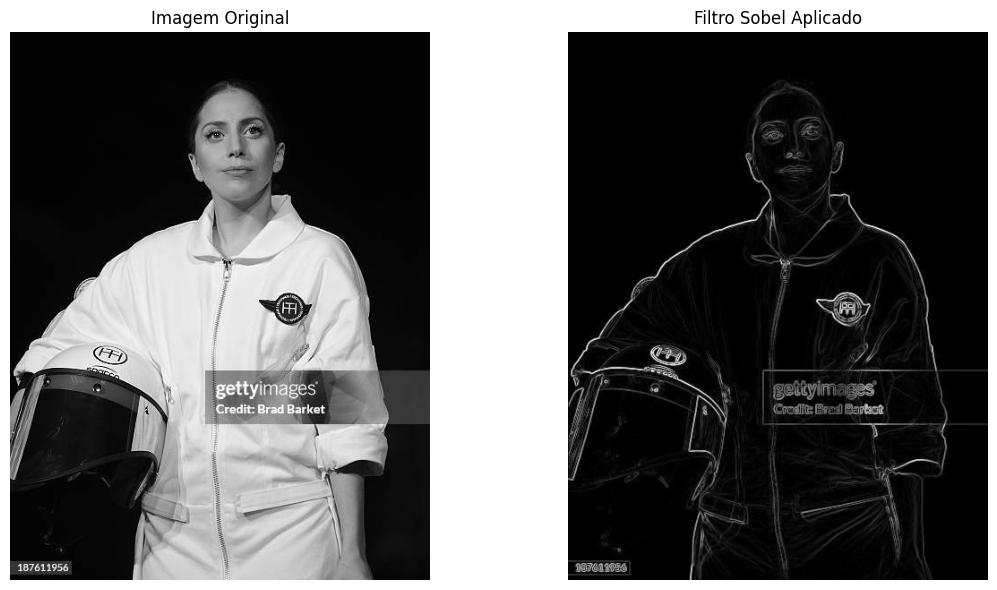

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
imagem = cv2.imread(r"D:\EDA\py\imagePy\gettyimages-187611956-612x612.JPG", cv2.IMREAD_GRAYSCALE)

# Aplicar o filtro Sobel
sobel_x = cv2.Sobel(imagem, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(imagem, cv2.CV_64F, 0, 1, ksize=3)

# Combinar os gradientes
sobel_combinado = np.sqrt(sobel_x**2 + sobel_y**2)

# Normalizar a imagem resultante para o intervalo 0-255
sobel_combinado = np.uint8(255 * sobel_combinado / np.max(sobel_combinado))

# Criar a figura para exibição
plt.figure(figsize=(12, 6))

# Exibir a imagem original
plt.subplot(121)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

# Exibir a imagem com o filtro Sobel aplicado
plt.subplot(122)
plt.imshow(sobel_combinado, cmap='gray')
plt.title('Filtro Sobel Aplicado')
plt.axis('off')

# Mostrar as imagens
plt.tight_layout()
plt.show()

In [1]:
# -*- coding: utf-8 -*-
from tkinter import Tk, PhotoImage
from tkinter import Entry as tkEntry
from tkinter.ttk import Frame, Label, Button, Entry, Separator, Style


'''
Title: Modern Interface for Python with Tkinter
by ngoma for Tabnews, 29.11.2022, Huambo-Angola
'''

# funcoes
def login():
    et_email.delete(0, 'end')
    et_senha.delete(0, 'end')
    et_email.focus_force()

def nova_conta():
    et_email.focus_force()

# primeira linha
root = Tk()

# frames
borda = Frame(root, style='Borda.TFrame')
borda.pack(fill='x', expand=True)

topo = Frame(borda)
topo.pack()

centro = Frame(borda)
centro.pack()

base = Frame(borda)
base.pack()

logo = PhotoImage(file='D:/EDA/py/imagePy/running-rushing.GIF')
lb_logo = Label(topo, image=logo)
lb_logo.image = logo
lb_logo.pack()

Label(centro, text='E-mail').pack(anchor='w', pady=(10,0))
et_email = tkEntry(centro, font=('Montserrat', 12, 'bold'), fg='#666', relief='flat', 
        highlightbackground='white', highlightcolor='white')
et_email.focus_force()
et_email.pack(fill='x')
Separator(centro, orient='horizontal').pack(fill='x')

Label(centro, text='Senha').pack(anchor='w', pady=(10,0))
et_senha =  tkEntry(centro, show='*', font=('Montserrat', 12, 'bold'), fg='#666', relief='flat', 
        highlightbackground='white', highlightcolor='white')
et_senha.pack()
Separator(centro, orient='horizontal').pack(fill='x', pady=(0,20))

Button(base, text='ENTRAR', command=login, cursor='hand1').pack(fill='x', pady=(0,10))
Label(base, text='Ainda não tens uma conta? ', style='Small.TLabel').pack(side='left')
Button(base, text='Crie agora.', command=nova_conta, cursor='hand1', style='Small.TButton').pack(side='left')


# fontes
Tfont = ('Montserrat ExtraBold', 22)
Pfont = ('Montserrat', 10)
Pfontb = ('Montserrat', 12, 'bold')
Sfont = ('Montserrat', 8)


# estilo
style = Style()
style.theme_use('default')
style.configure('TFrame', background='#fff')
style.configure('Borda.TFrame', width=300)
style.configure('TLabel', justify='right', font=Pfont, background='#fff', foreground='#808080')
style.configure('Small.TLabel', font=Sfont)
style.configure('TButton', padding=(60,7), font=Pfontb, foreground='#fff', background='#20bcbb', relief='')
style.configure('Small.TButton', padding=(0,-3), font=Sfont, width=0, height=0, foreground='#20bcbb', background='#fff', relief='')
style.configure('TSeparator', background='#bafafa')

style.map('TButton',
        foreground=[('pressed', '#e25ca5'), ('active', '#fff')],
        background=[('pressed', '!focus', '#3f8efc'), ('active', '#025b5a')],
        relief=[('pressed', 'flat'), ('!pressed', 'flat')])

style.map('Small.TButton',
        foreground=[('pressed', '#f3bb30'), ('active', '#025b5a')],
        background=[('pressed', '!focus', '#3f8efc'), ('active', '#fff')],
        relief=[('pressed', 'flat'), ('!pressed', 'flat')])

# ultimas linhas
root.title('Design moderno - tkinter')
root.geometry('400x550+100+100')
root.iconphoto(False, PhotoImage(file= r'D:\EDA\py\imagePy\apple.png'))
root.configure(bg='#fff')
root.mainloop()

In [14]:
import pyodbc 
import tkinter as tk
from tkinter import *
from tkinter import ttk, filedialog
import ttkbootstrap as ttkbs
from ttkbootstrap.constants import *
import cv2
import numpy as np
from PIL import Image, ImageTk

imagem_global = None
imagem_sobel = None  # Variável global para armazenar a imagem com filtro Sobel

def abrir_imagem():
    global imagem_global, imagem_sobel  # Declara as variáveis globais
    caminho_imagem = filedialog.askopenfilename(title="Escolha uma imagem", 
                                                filetypes=[("Arquivos de imagem", "*.jpg;*.png;*.jpeg")])
    if caminho_imagem:
        img = Image.open(caminho_imagem)
        img.thumbnail((400, 400))
        img_tk = ImageTk.PhotoImage(img)
        lbl_imagem.config(image=img_tk)
        lbl_imagem.image = img_tk  # Necessário para o tkinter manter a referência
        imagem_global = np.array(img)  # Converte a imagem PIL para NumPy

        # Aplica o filtro Sobel imediatamente após carregar a imagem
        aplicar_filtro('xy')

        # Mostra os botões após carregar a imagem
        btn_frame.pack(pady=10)

def aplicar_filtro(filtro):
    global imagem_global, imagem_sobel
    if imagem_global is not None:
        imagem_gray = cv2.cvtColor(imagem_global, cv2.COLOR_RGB2GRAY)
        if filtro == 'x':
            sobel = cv2.Sobel(imagem_gray, cv2.CV_64F, 1, 0, ksize=3)
        elif filtro == 'y':
            sobel = cv2.Sobel(imagem_gray, cv2.CV_64F, 0, 1, ksize=3)
        elif filtro == 'xy':  # Aplica ambos os filtros e combina
            sobel_x = cv2.Sobel(imagem_gray, cv2.CV_64F, 1, 0, ksize=3)
            sobel_y = cv2.Sobel(imagem_gray, cv2.CV_64F, 0, 1, ksize=3)
            sobel = np.sqrt(sobel_x**2 + sobel_y**2)

        sobel_normalizado = np.uint8(255 * (sobel - np.min(sobel)) / (np.max(sobel) - np.min(sobel)))
        imagem_sobel = Image.fromarray(sobel_normalizado)
        imagem_sobel.thumbnail((400, 400))
        img_sobel_tk = ImageTk.PhotoImage(imagem_sobel)
        
        lbl_imagem_sobel.config(image=img_sobel_tk)
        lbl_imagem_sobel.image = img_sobel_tk

def remover_filtro():
    global imagem_global
    if imagem_global is not None:
        img_tk = ImageTk.PhotoImage(Image.fromarray(imagem_global))
        lbl_imagem_sobel.config(image=img_tk)
        lbl_imagem_sobel.image = img_tk  # Atualiza a imagem

def aplicar_filtro_xy():
    aplicar_filtro('xy')  # Reaplica o filtro Sobel XY

# Cria a janela principal
janela = ttkbs.Window(themename="darkly")
janela.title("Tela de Seleção de Imagem")
janela.configure(bg="#333")

# Define o tamanho da janela e a centraliza
janela.geometry("900x500")
largura_tela = janela.winfo_screenwidth()
altura_tela = janela.winfo_screenheight()
pos_x = (largura_tela // 2) - (900 // 2)
pos_y = (altura_tela // 2) - (500 // 2)
janela.geometry(f"900x500+{pos_x}+{pos_y}")

menu_principal = Menu(janela)
janela.config(menu=menu_principal)

menu_opcoes = Menu(menu_principal, tearoff=0, bg="#1f4b99", fg="white", activebackground="#4a6fa5", activeforeground="white")
menu_principal.add_cascade(label="Menu", menu=menu_opcoes)
menu_opcoes.add_command(label="Add imagem", command=abrir_imagem)
menu_opcoes.add_command(label="Sair", command=janela.destroy)

# Layout principal
frame = tk.Frame(janela, bg="#333")
frame.pack(pady=20)

lbl_imagem = tk.Label(frame, bg="#333")
lbl_imagem.grid(row=0, column=0, padx=(20, 10))  # Imagem original

lbl_imagem_sobel = tk.Label(frame, bg="#333")
lbl_imagem_sobel.grid(row=0, column=1, padx=(10, 20))  # Imagem com filtro

# Botões para aplicar filtros e remover filtro (inicialmente ocultos)
btn_frame = tk.Frame(janela, bg="#333")

btn_sobel_x = tk.Button(btn_frame, text="Filtro Sobel em X", command=lambda: aplicar_filtro('x'), bg="#1f4b99", fg="white")
btn_sobel_x.pack(side=tk.LEFT, padx=5)

btn_sobel_y = tk.Button(btn_frame, text="Filtro Sobel em Y", command=lambda: aplicar_filtro('y'), bg="#1f4b99", fg="white")
btn_sobel_y.pack(side=tk.LEFT, padx=5)

btn_sobel_xy = tk.Button(btn_frame, text="Filtro Sobel XY", command=aplicar_filtro_xy, bg="#1f4b99", fg="white")
btn_sobel_xy.pack(side=tk.LEFT, padx=5)

btn_remover_filtro = tk.Button(btn_frame, text="Remover Filtro", command=remover_filtro, bg="#1f4b99", fg="white")
btn_remover_filtro.pack(side=tk.LEFT, padx=5)

# Inicia o loop da interface gráfica
janela.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Python312\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_16888\2159951841.py", line 27, in abrir_imagem
    aplicar_filtro('xy')
  File "C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_16888\2159951841.py", line 35, in aplicar_filtro
    imagem_gray = cv2.cvtColor(imagem_global, cv2.COLOR_RGB2GRAY)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
cv2.error: OpenCV(4.10.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x46dff480::Set<1,-1,-1>,struct cv::impl::A0x46dff480::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of chan

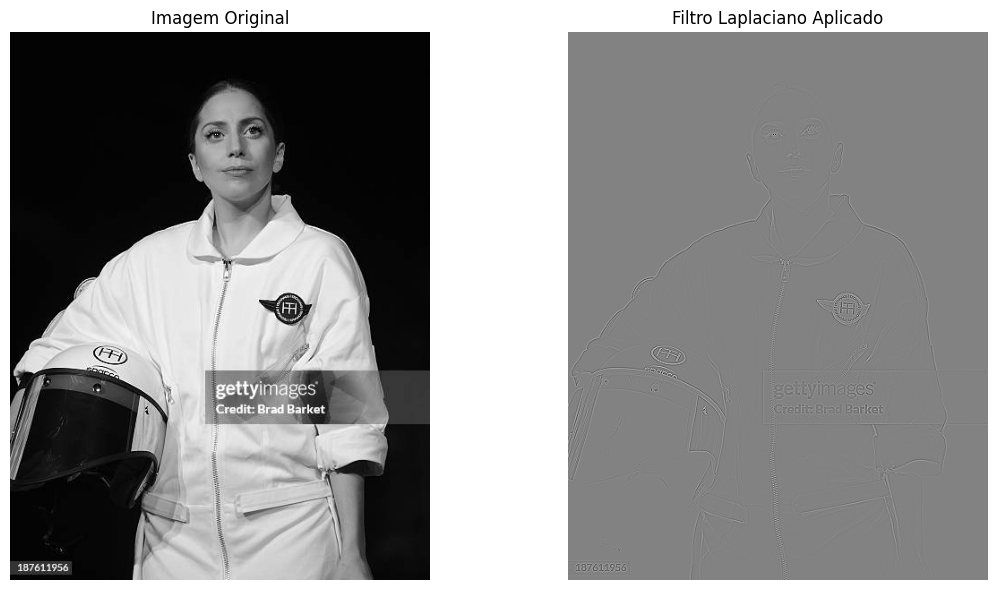

In [1]:
# laplace 
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
imagem = cv2.imread(r"D:\EDA\py\imagePy\gettyimages-187611956-612x612.JPG", cv2.IMREAD_GRAYSCALE)

# Aplicar o filtro Laplaciano
laplaciano = cv2.Laplacian(imagem, cv2.CV_64F)

# Normalizar a imagem resultante para o intervalo 0-255
laplaciano = np.uint8(255 * (laplaciano - np.min(laplaciano)) / (np.max(laplaciano) - np.min(laplaciano)))

# Criar a figura para exibição
plt.figure(figsize=(12, 6))

# Exibir a imagem original
plt.subplot(121)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

# Exibir a imagem com o filtro Laplaciano aplicado
plt.subplot(122)
plt.imshow(laplaciano, cmap='gray')
plt.title('Filtro Laplaciano Aplicado')
plt.axis('off')

# Mostrar as imagens
plt.tight_layout()
plt.show()


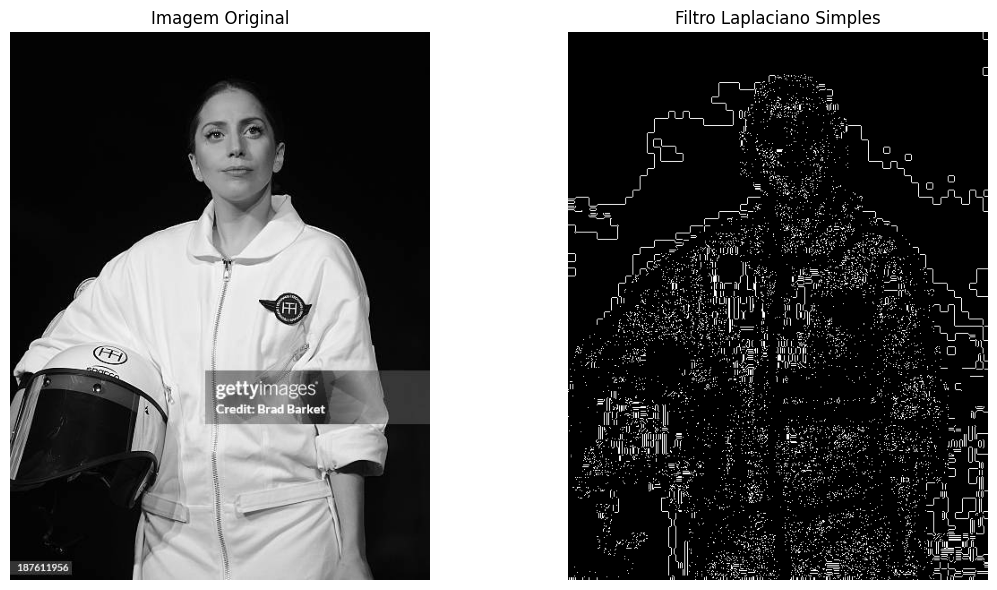

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
imagem = cv2.imread(r"D:\EDA\py\imagePy\gettyimages-187611956-612x612.JPG", cv2.IMREAD_GRAYSCALE)

# Definir a máscara do filtro Laplaciano
laplaciano_mask = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

# Aplicar o filtro Laplaciano
laplaciano_simples = cv2.filter2D(imagem, -1, laplaciano_mask)

# Normalizar a imagem resultante
laplaciano_simples = np.uint8(255 * (laplaciano_simples - np.min(laplaciano_simples)) / (np.max(laplaciano_simples) - np.min(laplaciano_simples)))

# Criar a figura para exibição
plt.figure(figsize=(12, 6))

# Exibir a imagem original
plt.subplot(121)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

# Exibir a imagem com o filtro Laplaciano simples aplicado
plt.subplot(122)
plt.imshow(laplaciano_simples, cmap='gray')
plt.title('Filtro Laplaciano Simples')
plt.axis('off')

# Mostrar as imagens
plt.tight_layout()
plt.show()


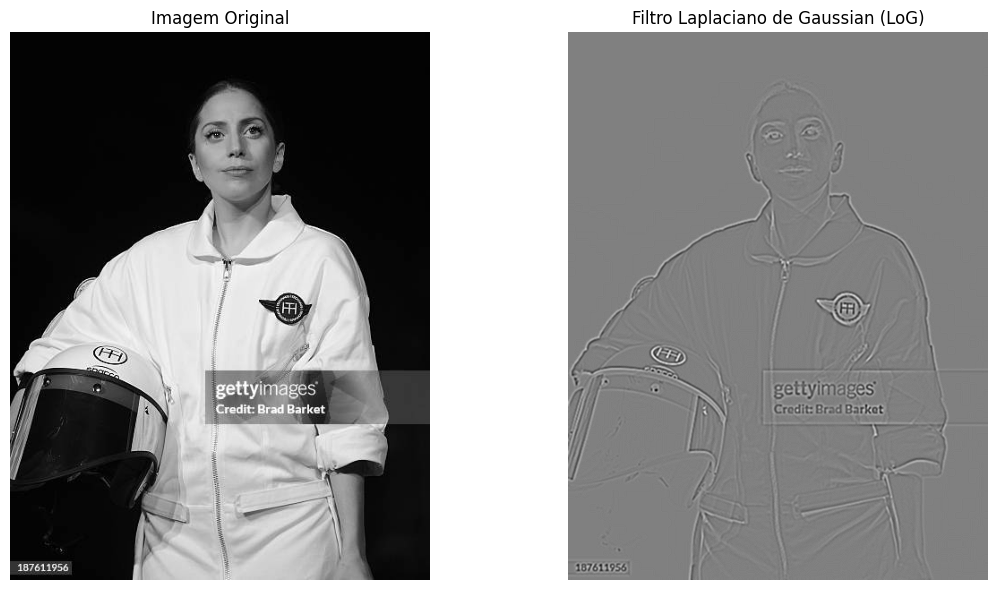

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
imagem = cv2.imread(r"D:\EDA\py\imagePy\gettyimages-187611956-612x612.JPG", cv2.IMREAD_GRAYSCALE)

# Aplicar o filtro Gaussian
imagem_gauss = cv2.GaussianBlur(imagem, (5, 5), 0)

# Aplicar o filtro Laplaciano
laplaciano_gauss = cv2.Laplacian(imagem_gauss, cv2.CV_64F)

# Normalizar a imagem resultante
laplaciano_gauss = np.uint8(255 * (laplaciano_gauss - np.min(laplaciano_gauss)) / (np.max(laplaciano_gauss) - np.min(laplaciano_gauss)))

# Criar a figura para exibição
plt.figure(figsize=(12, 6))

# Exibir a imagem original
plt.subplot(121)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

# Exibir a imagem com o filtro Laplaciano de Gaussian aplicado
plt.subplot(122)
plt.imshow(laplaciano_gauss, cmap='gray')
plt.title('Filtro Laplaciano de Gaussian (LoG)')
plt.axis('off')

# Mostrar as imagens
plt.tight_layout()
plt.show()


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

def aplicar_filtro_laplaciano(imagem, kernel_size=3):
    # Verificar se o tamanho do kernel é ímpar
    if kernel_size % 2 == 0:
        kernel_size += 1  # Se for par, incrementar para torná-lo ímpar

    # Definir a máscara do filtro Laplaciano
    laplaciano_mask = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    laplaciano_mask[kernel_size // 2, kernel_size // 2] = kernel_size * kernel_size - 1
    laplaciano_mask -= 1  # Define os outros valores como -1

    # Aplicar o filtro Laplaciano
    laplaciano = cv2.filter2D(imagem, -1, laplaciano_mask)
    return laplaciano

def atualizar(val):
    kernel_size = int(slider.val)
    laplaciano = aplicar_filtro_laplaciano(imagem, kernel_size)

    # Atualizar a imagem exibida
    ax2.clear()
    ax2.imshow(laplaciano, cmap='gray')
    ax2.set_title(f'Filtro Laplaciano (Kernel Size: {kernel_size})')
    ax2.axis('off')
    plt.draw()

# Carregar a imagem
imagem_path = r"D:\EDA\py\imagePy\gettyimages-187611956-612x612.JPG"
imagem = cv2.imread(imagem_path, cv2.IMREAD_GRAYSCALE)

# Configurar a figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(imagem, cmap='gray')
ax1.set_title('Imagem Original')
ax1.axis('off')

# Inicializar o filtro Laplaciano com kernel 3
laplaciano_inicial = aplicar_filtro_laplaciano(imagem, kernel_size=3)

# Exibir o filtro Laplaciano inicial
ax2.imshow(laplaciano_inicial, cmap='gray')
ax2.set_title('Filtro Laplaciano (Kernel Size: 3)')
ax2.axis('off')

# Criar a barra deslizante
axcolor = 'lightgoldenrodyellow'
ax_slider = plt.axes([0.1, 0.01, 0.8, 0.03], facecolor=axcolor)
slider = Slider(ax_slider, 'Kernel Size', 1, 50, valinit=3, valstep=1)

# Conectar o evento de atualização do slider
slider.on_changed(atualizar)

# Mostrar as imagens
plt.tight_layout()
plt.show()


C:\Users\T-Gamer\AppData\Local\Temp\ipykernel_20344\2048263855.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [3]:
%matplotlib qt

